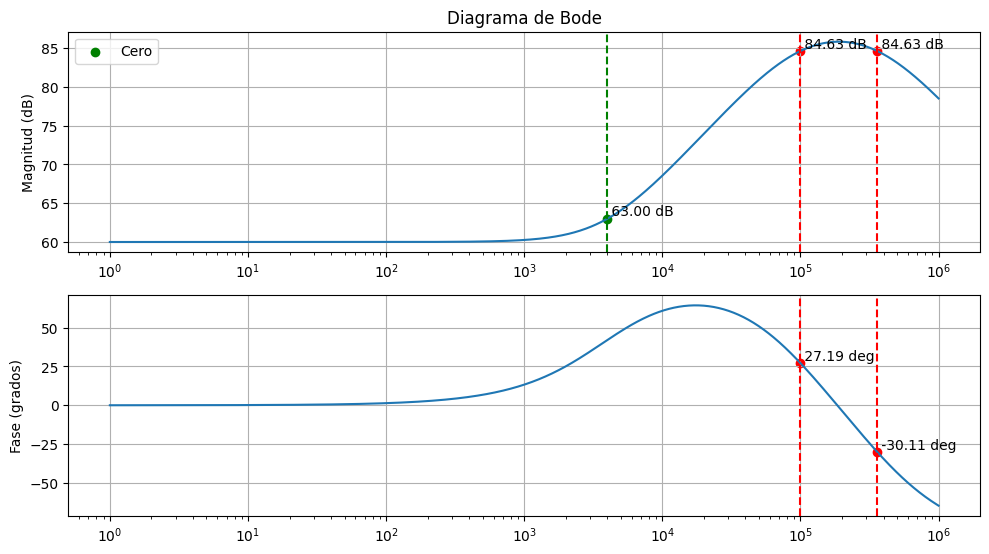

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia
def transfer_function(s):
    return (1000 + s / 4) / ((1 + s / 100000) * (1 + s / 360000))

# Crear un rango de valores de frecuencia angular (s)
s = 1j * np.logspace(0, 6, 1000)
H = transfer_function(s)

# Calcular la magnitud y la fase de la función de transferencia
mag = 20 * np.log10(np.abs(H))
phase = np.angle(H, deg=True)

# Calcular las frecuencias clave
frequencies = [100000, 360000]
mag_at_frequencies = 20 * np.log10(np.abs(transfer_function(1j * np.array(frequencies))))

# Encontrar el cero de la función de transferencia
zero_location = -4000
mag_at_zero = 20 * np.log10(np.abs(transfer_function(zero_location * 1j)))

# Trama de Bode
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.semilogx(np.abs(s), mag)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.semilogx(np.abs(s), phase)
plt.ylabel('Fase (grados)')
plt.grid(True)

# Marcar las frecuencias clave y el cero
for freq, mag_db in zip(frequencies, mag_at_frequencies):
    plt.subplot(3, 1, 1)
    plt.scatter(freq, mag_db, color='red')
    plt.text(freq, mag_db, f' {mag_db:.2f} dB', verticalalignment='bottom')
    plt.axvline(freq, color='red', linestyle='--')

    plt.subplot(3, 1, 2)
    plt.scatter(freq, np.angle(transfer_function(1j * freq), deg=True), color='red')
    plt.text(freq, np.angle(transfer_function(1j * freq), deg=True), f' {np.angle(transfer_function(1j * freq), deg=True):.2f} deg', verticalalignment='bottom')
    plt.axvline(freq, color='red', linestyle='--')

plt.subplot(3, 1, 1)
plt.scatter(np.abs(zero_location), mag_at_zero, color='green', marker='o', label='Cero')
plt.text(np.abs(zero_location), mag_at_zero, f' {mag_at_zero:.2f} dB', verticalalignment='bottom')
plt.axvline(np.abs(zero_location), color='green', linestyle='--')

plt.tight_layout()
plt.legend()
plt.show()
